In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mnist import MNIST
mndata = MNIST('C:\\Users\\jpv\\Dropbox\\src\\grokking_deep_learning')
images, labels = mndata.load_training()

print("num images: {}".format(len(images)))
print("num images: {}".format(len(labels)))

num images: 60000
num images: 60000


In [2]:
import vector_ops as vops
def show_number(raw_image, label):
    """interprets raw_image as a 28x28 matrix and displays it"""
    image = vops.matrix_of_zeroes(28, 28)

    offset = 0
    for row in range(28):
        lastOffset = offset
        offset += 28
        image[row] = raw_image[lastOffset:offset] 

    plt.matshow(image)
    plt.show()
    print("This is {}".format(label)) 

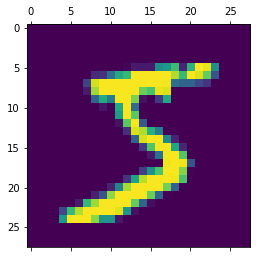

This is 5


In [3]:
#for i in range(10):
#    show_number(images[i], labels[i]) 
show_number(images[0], labels[0]) 

In [4]:
def elementwise_multiplication(vec_a, vec_b):
    assert(len(vec_a) == len(vec_b))
    res = []
    for ix, item in enumerate(vec_a):
        res.append(vec_a[ix] * vec_b[ix])
    return res

In [5]:
def w_sum(vec_a, vec_b):
    #print("len vec_a {} \n len vec_b {}".format(len(vec_a), len(vec_b)))
    assert(len(vec_a) == len(vec_b))
    multiplied_elements = elementwise_multiplication(vec_a, vec_b)
    return vector_sum(multiplied_elements)

In [6]:
def vector_of_zeroes(len):
    return [0] * len

In [7]:
def matrix_of_zeroes(rows, columns):
    res = []
    for r in range(rows):
        res.append([0] * columns)
    return res

In [8]:
def outer_prod(vec_a, vec_b):
    #print("vec_a: {}, vec_b: {}".format(vec_a, vec_b))
    res = matrix_of_zeroes(len(vec_a), len(vec_b))
    for i in range(len(vec_a)):
        for j in range(len(vec_b)):
            res[i][j] = vec_a[i] * vec_b[j]
    return res

In [9]:
def vector_sum(vec_a):
    res = 0
    for elem in vec_a:
        res += elem
    return res

In [10]:
#%pdb
def vect_mat_mul(vect, matrix):
    #print("vect{} \n matrix {}".format(vect, matrix))
    #print("len vect {} \n len matrix {}".format(len(vect), len(matrix)))
    assert(len(vect) == len(matrix))
    output = vector_of_zeroes(len(vect))
    for i in range(len(vect)):
        print("** i={}, len(vect)={}, len(matrix[i])={}".format(i, len(vect), len(matrix[i])))
        output[i] = w_sum(vect,matrix[i])
        print("output[i]={}".format(output[i]))
    return output

In [11]:
def neural_network(inputs, weights):
    #return vect_mat_mul(inputs, weights)
    assert(len(inputs) == len(weights[0]))
    # multiply each input value with each weight vector in weights
    # and append the vector sum to output
    output = vector_of_zeroes(len(weights)) # predictions; one per possible result
    for i, vector in enumerate(weights):
        output[i] = w_sum(inputs, vector)
    return output

img ix: 0
error: [195931852.60858855, 216038536.81500188, 187319870.7326621, 185383166.4427405, 180692677.85298038, 164789245.56154492, 203957810.50111496, 168480410.1159142, 164346569.38816547, 159595811.0756238], delta: [13997.565953000134, 14698.249447298202, 13686.484966296573, 13615.54870149347, 13442.197657116205, 12837.026351984518, 14281.379852840375, 12980.000389673114, 12819.772595025446, 12633.123567654351]
pred: [13997.565953000134, 14698.249447298202, 13686.484966296573, 13615.54870149347, 13442.197657116205, 12838.026351984518, 14281.379852840375, 12980.000389673114, 12819.772595025446, 12633.123567654351]
error: [195931852.60858855, 216038536.81500188, 187319870.7326621, 185383166.4427405, 180692677.85298038, 27163133.17699028, 203957810.50111496, 168480410.1159142, 164346569.38816547, 159595811.0756238], delta: [13997.565953000134, 14698.249447298202, 13686.484966296573, 13615.54870149347, 13442.197657116205, 5211.8262803925345, 14281.379852840375, 12980.000389673114, 1

img ix: 10
error: [40667382.213259816, 19854471.428769074, 53695381.26317848, 6748350.069778469, 79441662.37273858, 24389361.257130332, 174370188.10504362, 172158579.35129148, 184771831.87405473, 51719463.63724479], delta: [6377.0982596522545, 4455.835659982207, 7327.71323559939, 2597.7586627280198, 8913.005238006908, 4938.558621412763, 13204.930446808254, 13120.921436823386, 13593.080293813273, 7191.6245478504225]
pred: [6377.0982596522545, 4455.835659982207, 7327.71323559939, 2598.7586627280198, 8913.005238006908, 4938.558621412763, 13204.930446808254, 13120.921436823386, 13593.080293813273, 7191.6245478504225]
error: [40667382.213259816, 19854471.428769074, 53695381.26317848, 878293.4760341282, 79441662.37273858, 24389361.257130332, 174370188.10504362, 172158579.35129148, 184771831.87405473, 51719463.63724479], delta: [6377.0982596522545, 4455.835659982207, 7327.71323559939, 937.1731302348186, 8913.005238006908, 4938.558621412763, 13204.930446808254, 13120.921436823386, 13593.080293

error: [40667382.213259816, 19854471.428769074, 53695381.26317848, 1.7079715689035433e-12, 79441662.37273858, 24389361.257130332, 174370188.10504362, 172158579.35129148, 184771831.87405473, 51719463.63724479], delta: [6377.0982596522545, 4455.835659982207, 7327.71323559939, 1.3068938629068327e-06, 8913.005238006908, 4938.558621412763, 13204.930446808254, 13120.921436823386, 13593.080293813273, 7191.6245478504225]
pred: [6377.0982596522545, 4455.835659982207, 7327.71323559939, 1.000001306893863, 8913.005238006908, 4938.558621412763, 13204.930446808254, 13120.921436823386, 13593.080293813273, 7191.6245478504225]
error: [40667382.213259816, 19854471.428769074, 53695381.26317848, 2.2229092846094982e-13, 79441662.37273858, 24389361.257130332, 174370188.10504362, 172158579.35129148, 184771831.87405473, 51719463.63724479], delta: [6377.0982596522545, 4455.835659982207, 7327.71323559939, 4.7147738913011494e-07, 8913.005238006908, 4938.558621412763, 13204.930446808254, 13120.921436823386, 13593

img ix: 30
error: [66725480.794460274, 20876937.77168614, 6208667.932462868, 23113345.637462437, 19851544.99111886, 30025419.43043653, 43886554.04166446, 67364688.03604107, 58024530.858961664, 29792311.450379085], delta: [8168.5666303495545, 4569.1287760016285, 2491.719874396572, 4807.634099789879, 4455.507265297506, 5479.5455496269515, 6624.692750736781, 8207.599407624684, 7617.383465400811, 5458.233363495838]
pred: [8168.5666303495545, 4569.1287760016285, 2491.719874396572, 4808.634099789879, 4455.507265297506, 5479.5455496269515, 6624.692750736781, 8207.599407624684, 7617.383465400811, 5458.233363495838]
error: [66725480.794460274, 20876937.77168614, 6208667.932462868, 4974718.111069146, 19851544.99111886, 30025419.43043653, 43886554.04166446, 67364688.03604107, 58024530.858961664, 29792311.450379085], delta: [8168.5666303495545, 4569.1287760016285, 2491.719874396572, 2230.4076109691578, 4455.507265297506, 5479.5455496269515, 6624.692750736781, 8207.599407624684, 7617.383465400811, 

img ix: 38
img ix: 39
img ix: 40
error: [4694989.517361037, 431711.1477876369, 162360.40521969378, 1486846.7087658965, 7028249.356492352, 605502.6936637514, 1580385.8003155692, 2426127.096523368, 120594.95140461529, 9652.56011573383], delta: [2166.7924490732926, -657.0472949397455, -402.9397041986478, -1219.3632390579505, 2651.0845623050864, 778.1405359340633, 1257.1339627563839, 1557.602997083457, 347.26783813738825, 98.24744330380221]
pred: [2166.7924490732926, -656.0472949397455, -402.9397041986478, -1219.3632390579505, 2651.0845623050864, 778.1405359340633, 1257.1339627563839, 1557.602997083457, 347.26783813738825, 98.24744330380221]
error: [4694989.517361037, 212880.59000614443, 162360.40521969378, 1486846.7087658965, 7028249.356492352, 605502.6936637514, 1580385.8003155692, 2426127.096523368, 120594.95140461529, 9652.56011573383], delta: [2166.7924490732926, -461.3898460154324, -402.9397041986478, -1219.3632390579505, 2651.0845623050864, 778.1405359340633, 1257.1339627563839, 155

pred: [2166.7924490732926, 0.9330342007650074, -402.9397041986478, -1219.3632390579505, 2651.0845623050864, 778.1405359340633, 1257.1339627563839, 1557.602997083457, 347.26783813738825, 98.24744330380221]
error: [4694989.517361037, 0.0022113063594406722, 162360.40521969378, 1486846.7087658965, 7028249.356492352, 605502.6936637514, 1580385.8003155692, 2426127.096523368, 120594.95140461529, 9652.56011573383], delta: [2166.7924490732926, -0.04702452933779, -402.9397041986478, -1219.3632390579505, 2651.0845623050864, 778.1405359340633, 1257.1339627563839, 1557.602997083457, 347.26783813738825, 98.24744330380221]
pred: [2166.7924490732926, 0.95297547066221, -402.9397041986478, -1219.3632390579505, 2651.0845623050864, 778.1405359340633, 1257.1339627563839, 1557.602997083457, 347.26783813738825, 98.24744330380221]
error: [4694989.517361037, 0.0010904147481181695, 162360.40521969378, 1486846.7087658965, 7028249.356492352, 605502.6936637514, 1580385.8003155692, 2426127.096523368, 120594.9514046

error: [4193633.803580797, 8887436.134646049, 969932.8221058018, 0.00024050820577553272, 20540667.676316816, 9259060.931427432, 13409775.722618025, 18390073.82165703, 6187048.651956651, 18612562.278482173], delta: [2047.8363712906353, 2981.180325751203, 984.8516751804821, -0.015508326981835685, 4532.181337536796, 3042.870508488232, 3661.9360620603447, 4288.364935690179, 2487.3778667417323, 4314.227889029759]
pred: [2047.8363712906353, 2981.180325751203, 984.8516751804821, 0.9844916730181643, 4532.181337536796, 3042.870508488232, 3661.9360620603447, 4288.364935690179, 2487.3778667417323, 4314.227889029759]
error: [4193633.803580797, 8887436.134646049, 969932.8221058018, 9.19632308629352e-05, 20540667.676316816, 9259060.931427432, 13409775.722618025, 18390073.82165703, 6187048.651956651, 18612562.278482173], delta: [2047.8363712906353, 2981.180325751203, 984.8516751804821, -0.009589746131307919, 4532.181337536796, 3042.870508488232, 3661.9360620603447, 4288.364935690179, 2487.37786674173

img ix: 57
img ix: 58
img ix: 59
img ix: 60
error: [48404739.87225199, 111246158.92199771, 19823545.715752807, 92749107.7480388, 14772636.574408792, 90988732.99489559, 83703681.92735215, 22245193.634449933, 62032978.85444116, 87410925.99319166], delta: [6957.35149839736, 10547.329468732723, 4452.364059210882, 9630.633818603987, 3843.518775082124, 9538.801444358489, 9148.971632230157, 4716.481064782295, 7876.101754957281, 9349.381048667963]
pred: [6957.35149839736, 10547.329468732723, 4452.364059210882, 9630.633818603987, 3844.518775082124, 9538.801444358489, 9148.971632230157, 4716.481064782295, 7876.101754957281, 9349.381048667963]
error: [48404739.87225199, 111246158.92199771, 19823545.715752807, 92749107.7480388, 1822756.9408845862, 90988732.99489559, 83703681.92735215, 22245193.634449933, 62032978.85444116, 87410925.99319166], delta: [6957.35149839736, 10547.329468732723, 4452.364059210882, 9630.633818603987, 1350.0951599367306, 9538.801444358489, 9148.971632230157, 4716.4810647822

error: [48404739.87225199, 111246158.92199771, 19823545.715752807, 92749107.7480388, 1.5045692341894126e-13, 90988732.99489559, 83703681.92735215, 22245193.634449933, 62032978.85444116, 87410925.99319166], delta: [6957.35149839736, 10547.329468732723, 4452.364059210882, 9630.633818603987, 3.8788777168008437e-07, 9538.801444358489, 9148.971632230157, 4716.481064782295, 7876.101754957281, 9349.381048667963]
pred: [6957.35149839736, 10547.329468732723, 4452.364059210882, 9630.633818603987, 1.0000003878877717, 9538.801444358489, 9148.971632230157, 4716.481064782295, 7876.101754957281, 9349.381048667963]
error: [48404739.87225199, 111246158.92199771, 19823545.715752807, 92749107.7480388, 1.856432720587598e-14, 90988732.99489559, 83703681.92735215, 22245193.634449933, 62032978.85444116, 87410925.99319166], delta: [6957.35149839736, 10547.329468732723, 4452.364059210882, 9630.633818603987, 1.3625097139424724e-07, 9538.801444358489, 9148.971632230157, 4716.481064782295, 7876.101754957281, 9349

pred: [1111.7825382260523, 3.16872333256838, 546.1071146967204, 2530.3394611761164, 4802.531340770556, 983.4967365040724, 1488.5144568017004, 2974.575372352293, 2250.66363950873, 2140.369818991128]
error: [1236060.4123043634, 1.21413993023935, 298232.9807223769, 6402617.788785039, 23064307.279083434, 967265.8307141608, 2215675.288107661, 8848098.645804783, 5065486.818206682, 4581182.962048113], delta: [1111.7825382260523, 1.1018801796199758, 546.1071146967204, 2530.3394611761164, 4802.531340770556, 983.4967365040724, 1488.5144568017004, 2974.575372352293, 2250.66363950873, 2140.369818991128]
pred: [1111.7825382260523, 2.1018801796199758, 546.1071146967204, 2530.3394611761164, 4802.531340770556, 983.4967365040724, 1488.5144568017004, 2974.575372352293, 2250.66363950873, 2140.369818991128]
error: [1236060.4123043634, 0.3134217857541971, 298232.9807223769, 6402617.788785039, 23064307.279083434, 967265.8307141608, 2215675.288107661, 8848098.645804783, 5065486.818206682, 4581182.962048113],

img ix: 79
img ix: 80
error: [7109598.109988944, 34867687.43334068, 42527.99182659994, 15464266.045438206, 11582008.27633884, 28189901.861017685, 18057804.698731333, 33476095.32726973, 12509783.375727398, 24380588.816544145], delta: [2666.3829638648954, 5904.8867417877445, -206.2231602575228, 3932.4631015990735, 3403.2349722490276, 5309.416339016718, 4249.447575712793, 5785.853033673577, 3536.9172135812564, 4937.67038354568]
pred: [2666.3829638648954, 5904.8867417877445, -206.2231602575228, 3932.4631015990735, 3403.2349722490276, 5309.416339016718, 4249.447575712793, 5785.853033673577, 3536.9172135812564, 4938.67038354568]
error: [7109598.109988944, 34867687.43334068, 42527.99182659994, 15464266.045438206, 11582008.27633884, 28189901.861017685, 18057804.698731333, 33476095.32726973, 12509783.375727398, 5057584.506159064], delta: [2666.3829638648954, 5904.8867417877445, -206.2231602575228, 3932.4631015990735, 3403.2349722490276, 5309.416339016718, 4249.447575712793, 5785.853033673577, 3

error: [7053521.338977747, 40604805.55663678, 6998489.588980905, 30061232.10057734, 19622421.263282858, 42699410.58610708, 1680.0415456491776, 22699093.266396295, 38715202.66101335, 22316596.331273276], delta: [2655.8466331807917, 6372.190012596672, 2645.465854812892, 5482.812426171202, 4429.720224041565, 6534.478600937268, -40.988309865730955, 4764.356542744917, 6222.154181713384, 4724.044488705973]
pred: [2655.8466331807917, 6372.190012596672, 2645.465854812892, 5482.812426171202, 4429.720224041565, 6534.478600937268, -39.988309865730955, 4764.356542744917, 6222.154181713384, 4724.044488705973]
error: [7053521.338977747, 40604805.55663678, 6998489.588980905, 30061232.10057734, 19622421.263282858, 42699410.58610708, 210.9628461097399, 22699093.266396295, 38715202.66101335, 22316596.331273276], delta: [2655.8466331807917, 6372.190012596672, 2645.465854812892, 5482.812426171202, 4429.720224041565, 6534.478600937268, -14.524560100386514, 4764.356542744917, 6222.154181713384, 4724.0444887

error: [7053521.338977747, 40604805.55663678, 6998489.588980905, 30061232.10057734, 19622421.263282858, 42699410.58610708, 6.4194130717798305e-12, 22699093.266396295, 38715202.66101335, 22316596.331273276], delta: [2655.8466331807917, 6372.190012596672, 2645.465854812892, 5482.812426171202, 4429.720224041565, 6534.478600937268, -2.5336560681710196e-06, 4764.356542744917, 6222.154181713384, 4724.044488705973]
pred: [2655.8466331807917, 6372.190012596672, 2645.465854812892, 5482.812426171202, 4429.720224041565, 6534.478600937268, 0.9999974663439318, 4764.356542744917, 6222.154181713384, 4724.044488705973]
error: [7053521.338977747, 40604805.55663678, 6998489.588980905, 30061232.10057734, 19622421.263282858, 42699410.58610708, 8.060858483699735e-13, 22699093.266396295, 38715202.66101335, 22316596.331273276], delta: [2655.8466331807917, 6372.190012596672, 2645.465854812892, 5482.812426171202, 4429.720224041565, 6534.478600937268, -8.978228379641351e-07, 4764.356542744917, 6222.154181713384

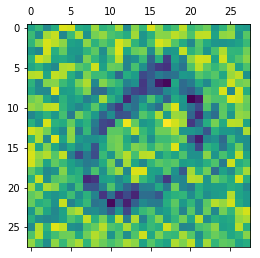

This is 0


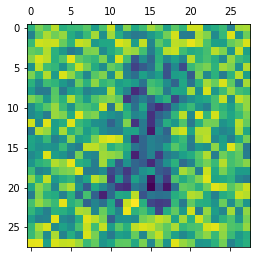

This is 1


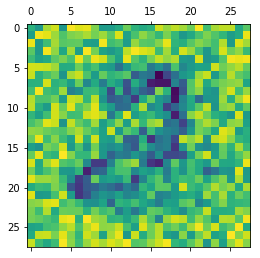

This is 2


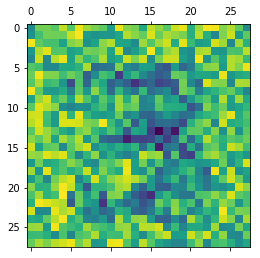

This is 3


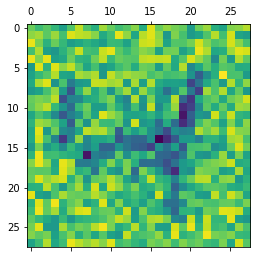

This is 4


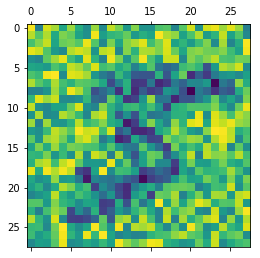

This is 5


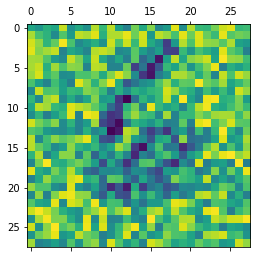

This is 6


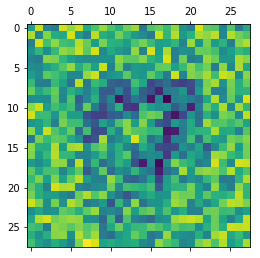

This is 7


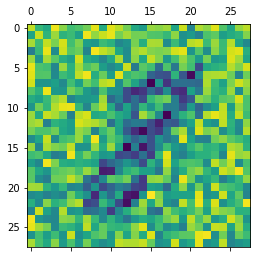

This is 8


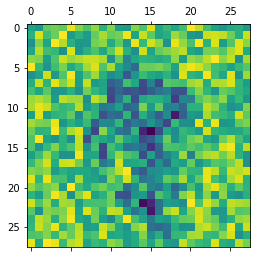

This is 9


In [27]:
#%pdb
import random as rand

goal_predictions = [
    [1,0,0,0,0,0,0,0,0,0], # P(0) = 1
    [0,1,0,0,0,0,0,0,0,0], # 1
    [0,0,1,0,0,0,0,0,0,0], # 2
    [0,0,0,1,0,0,0,0,0,0], # 3
    [0,0,0,0,1,0,0,0,0,0], # 4
    [0,0,0,0,0,1,0,0,0,0], # 5
    [0,0,0,0,0,0,1,0,0,0], # 6
    [0,0,0,0,0,0,0,1,0,0], # 7
    [0,0,0,0,0,0,0,0,1,0], # 8
    [0,0,0,0,0,0,0,0,0,1]  # 9
]

#784 (28*28 pixels) inputs (one per pixel) and 10 predictions, each a number describing the likelihood of it being true
#each prediction has a weight for every one of the 784 pixels/inputs

#there is a set of 28*28 weights for each output
weights = []
input_size = len(images[0])
for i in range(10):
    outputs = []
    for j in range(input_size):
        outputs.append(rand.random())
    weights.append(outputs)

alpha = 0.0000001 # determined by experimenting/looking at the size of alpha * weight_deltas[i][j]
for img_ix in range(100):
    print("img ix: {}".format(img_ix))
    inputs = images[img_ix]
    label = labels[img_ix]
    goal_prediction = goal_predictions[label]
    for x in range(30):
        pred = neural_network(inputs, weights) 
        error = [0] * len(goal_prediction)
        delta = [0] * len(goal_prediction)

        for i in range(len(goal_prediction)):
            error[i] = (pred[i] - goal_prediction[i]) ** 2
            delta[i] = pred[i] - goal_prediction[i]

        if img_ix % 10 == 0:
            print("error: {}, delta: {}".format(error, delta))
            print("pred: {}".format(pred))

        weight_deltas = outer_prod(delta, inputs)

        #update weights for the current label
        for j in range(len(weights[label])):
            weights[label][j] -= alpha * weight_deltas[label][j] ## why is i, fixed, better than label????

for i, weight_set in enumerate(weights):
    show_number(weight_set, i)